In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
try:
    calls_pd = pd.read_csv('/datasets/calls.csv')
    internet_pd = pd.read_csv('/datasets/internet.csv').drop(columns='Unnamed: 0')
    messages_pd = pd.read_csv('/datasets/messages.csv')
    tariffs_pd = pd.read_csv('/datasets/tariffs.csv')
    users_pd = pd.read_csv('/datasets/users.csv')
except:
    calls_pd = pd.read_csv('./calls.csv')
    internet_pd = pd.read_csv('./internet.csv').drop(columns='Unnamed: 0')
    messages_pd = pd.read_csv('./messages.csv')
    tariffs_pd = pd.read_csv('./tariffs.csv')
    users_pd = pd.read_csv('./users.csv')

### Предобработка данных

#### Общая информация входных данных

In [3]:
def df_info(df, n_head=3):  
    print('shape: \n',df.shape, '\n')
    print('info: \n', df.info(), '\n')
    print('head: \n', df.head(n_head))

In [4]:
df_info(calls_pd)

shape: 
 (202607, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
info: 
 None 

head: 
        id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000


In [5]:
df_info(internet_pd)

shape: 
 (149396, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
info: 
 None 

head: 
        id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1 1,052.81   2018-09-07     1000
2  1000_2 1,197.26   2018-06-25     1000


In [6]:
df_info(messages_pd)

shape: 
 (123036, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
info: 
 None 

head: 
        id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000


In [7]:
df_info(tariffs_pd)

shape: 
 (2, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
info: 
 None 

head: 
    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


In [8]:
df_info(users_pd)

shape: 
 (500, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
info: 
 None 

head: 
    user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   

  tariff  
0  ultra  
1  smart  
2  smart  


#### Замена типов данных

In [9]:
calls_pd['call_date'] = pd.to_datetime(calls_pd['call_date'], format='%Y-%m-%d')

In [10]:
internet_pd['session_date'] = pd.to_datetime(internet_pd['session_date'], format='%Y-%m-%d')

In [11]:
messages_pd['message_date'] = pd.to_datetime(messages_pd['message_date'], format='%Y-%m-%d')

In [12]:
users_pd['churn_date'] = pd.to_datetime(users_pd['churn_date'], format='%Y-%m-%d')
users_pd['reg_date'] = pd.to_datetime(users_pd['reg_date'], format='%Y-%m-%d')

##### Вывод
заменили тип со значением даты с object на datetime
остальные колонки датафреймов имеют корректные типы

#### Заполнение пропусков

In [13]:
calls_pd.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [14]:
internet_pd.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [15]:
messages_pd.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [16]:
tariffs_pd.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [17]:
users_pd.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

##### Вывод
Пропусков не обнаружено, пустоты в churn_date означают действие тарифа на текущий момент времени

#### Распределения входных данных

In [18]:
calls_pd.duration.describe()

count   202,607.00
mean          6.76
std           5.84
min           0.00
25%           1.30
50%           6.00
75%          10.70
max          38.00
Name: duration, dtype: float64

In [19]:
internet_pd.mb_used.describe()

count   149,396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.01
75%         559.55
max       1,724.83
Name: mb_used, dtype: float64

In [20]:
users_pd.age.describe()

count   500.00
mean     46.59
std      16.67
min      18.00
25%      32.00
50%      46.00
75%      62.00
max      75.00
Name: age, dtype: float64

##### Вывод 
- в среднем, клиенты расходуют по 6 минут за звонок, 348mb траффика.
- средний профиль нашего клиента - 46 лет, самому взрослому - 75 лет, молодому - 18, что объяснимо правилами оказания услуг связи

#### Базовые метрики по клиентам

In [21]:
# формируем новое поле - годмесяц
calls_pd['yearmonth'] = pd.DatetimeIndex(calls_pd['call_date']).year * 100 + pd.DatetimeIndex(calls_pd['call_date']).month
messages_pd['yearmonth'] = pd.DatetimeIndex(messages_pd['message_date']).year * 100 + pd.DatetimeIndex(messages_pd['message_date']).month
internet_pd['yearmonth'] = pd.DatetimeIndex(internet_pd['session_date']).year * 100 + pd.DatetimeIndex(internet_pd['session_date']).month

calls_pd.head(1)

,id,call_date,duration,user_id,yearmonth
0,1000_0,2018-07-25,0.00,1000,201807


In [22]:
# т.к. оператор округляет все звонки до минут, формируем новое поле
calls_pd['duration_ceil'] = calls_pd['duration'].apply(math.ceil)
calls_pd.head(1)

,id,call_date,duration,user_id,yearmonth,duration_ceil
0,1000_0,2018-07-25,0.00,1000,201807,0


In [23]:
calls_user_agg = calls_pd.groupby(["user_id", "yearmonth"])['duration_ceil'].agg({'cnt_call':'count', 'sum_call':'sum'})
calls_user_agg = calls_user_agg.reset_index()
calls_user_agg.head(1)

/Users/mandarinka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,user_id,yearmonth,cnt_call,sum_call
0,1000,201805,22,159


In [24]:
messages_user_agg = messages_pd.groupby(["user_id", "yearmonth"])['id'].agg({'cnt_mes':'count'})
messages_user_agg.head(1)

/Users/mandarinka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,,cnt_mes
user_id,yearmonth,
1000,201805,22


In [25]:
internet_user_agg = internet_pd.groupby(["user_id", "yearmonth"])['mb_used'].agg({'sum_mb':'sum'})
internet_user_agg.head(1)

/Users/mandarinka/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,,sum_mb
user_id,yearmonth,
1000,201805,"2,253.49"


In [26]:
users_call = users_pd.merge(calls_user_agg, on='user_id', how='left')
users_call.head(1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,yearmonth,cnt_call,sum_call
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,805.00",22.00,159.00


In [27]:
users_data = (
    users_call.merge(messages_user_agg, on=['user_id', 'yearmonth'], how='left')
                .merge(internet_user_agg, on=['user_id', 'yearmonth'], how='left')
                .merge(tariffs_pd, left_on='tariff', right_on='tariff_name', how='inner')
)

users_data.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,yearmonth,cnt_call,sum_call,cnt_mes,sum_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,805.00",22.00,159.00,22.00,"2,253.49",1000,30720,3000,1950,150,1,1,ultra
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,806.00",43.00,172.00,60.00,"23,233.77",1000,30720,3000,1950,150,1,1,ultra
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,807.00",47.00,340.00,75.00,"14,003.64",1000,30720,3000,1950,150,1,1,ultra


In [28]:
users_data['balance_call'] = users_data['minutes_included'] - users_data['sum_call']
users_data['balance_mess'] = users_data['messages_included'] - users_data['cnt_mes']
users_data['balance_intr'] = users_data['mb_per_month_included'] - users_data['sum_mb']

In [29]:
def calc_revenue(rub_monthly_fee, bal_call, bal_intr, bal_mess, rub_per_minute, rub_per_gb, rub_per_message):
    rev = rub_monthly_fee
    if bal_call < 0:
        rev += math.ceil(abs(bal_call)) * rub_per_minute
    if bal_intr < 0:
        rev += math.ceil(abs(bal_intr) / 1000) * rub_per_gb
    if bal_mess < 0:
        rev += math.ceil(abs(bal_mess)) * rub_per_message
    return rev

In [30]:
users_data['revenue'] = users_data.apply(lambda r: calc_revenue(r['rub_monthly_fee'], r['balance_call'],
                                                                r['balance_intr'], r['balance_mess'],
                                                               r['rub_per_minute'], r['rub_per_gb'],
                                                               r['rub_per_message']), axis=1)

users_data.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,yearmonth,cnt_call,sum_call,cnt_mes,sum_mb,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,balance_call,balance_mess,balance_intr,revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,805.00",22.00,159.00,22.00,"2,253.49",1000,30720,3000,1950,150,1,1,ultra,"2,841.00",978.00,"28,466.51",1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,806.00",43.00,172.00,60.00,"23,233.77",1000,30720,3000,1950,150,1,1,ultra,"2,828.00",940.00,"7,486.23",1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,"201,807.00",47.00,340.00,75.00,"14,003.64",1000,30720,3000,1950,150,1,1,ultra,"2,660.00",925.00,"16,716.36",1950


##### Вывод
Для каждого пользователя посчитали:
- количество сделанных звонков и израсходованных минут разговора по месяцам (cnt_call и sum_call соответственно);
- количество отправленных сообщений по месяцам (cnt_mes);
- объем израсходованного интернет-трафика по месяцам (sum_mb);
- помесячную выручку с каждого пользователя (revenue).

### Анализ данных
Требуется описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

In [31]:
users_data.tariff_name.value_counts()

smart    2225
ultra     957
Name: tariff_name, dtype: int64

Тариф smart
       sum_call  cnt_mes    sum_mb
count  2,223.00 1,916.00  2,222.00
mean     419.06    38.75 16,216.66
std      189.33    26.82  5,867.50
min        0.00     1.00      0.00
25%      285.00    17.00 12,655.26
50%      423.00    34.00 16,505.47
75%      545.50    55.00 20,048.04
max    1,435.00   143.00 38,552.45
sum_call


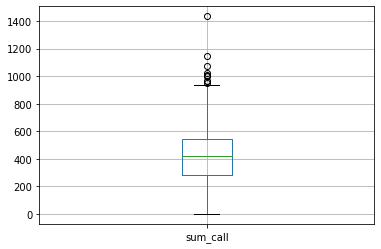

variance: 35828.06530953038 

cnt_mes


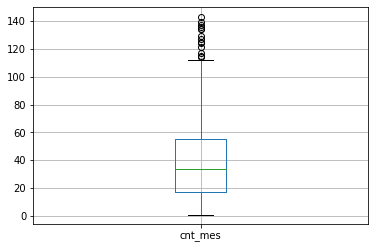

variance: 718.7973574905893 

sum_mb


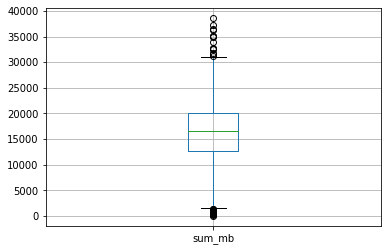

variance: 34412098.45716458 



In [32]:
print("Тариф smart")
users_data_smart = users_data.query("tariff_name=='smart'")
print(users_data_smart[['sum_call', 'cnt_mes', 'sum_mb']].describe())

for f in ['sum_call', 'cnt_mes', 'sum_mb']:
    print(f"{f}")
    users_data_smart.boxplot(f)
    plt.show()
    print(f"variance: {np.var(users_data_smart[{f}])[0]}", "\n")

Тариф ultra
       sum_call  cnt_mes    sum_mb
count    951.00   762.00    941.00
mean     545.45    61.20 19,669.28
std      306.93    44.72  9,978.53
min        0.00     1.00      0.00
25%      310.00    25.00 11,873.28
50%      528.00    52.00 19,428.21
75%      756.50    88.00 26,865.25
max    1,673.00   224.00 49,745.69
sum_call


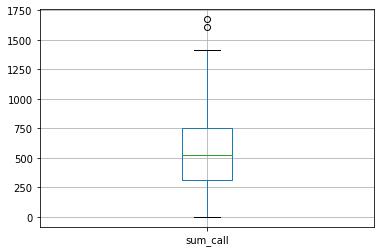

variance: 94104.36117385981 

cnt_mes


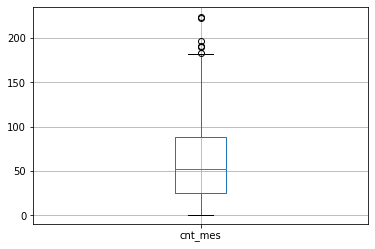

variance: 1996.9499538443513 

sum_mb


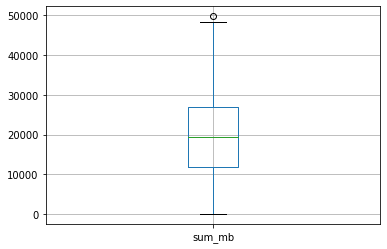

variance: 99465187.55618367 



In [33]:
print("Тариф ultra")
users_data_ultra = users_data.query("tariff_name=='ultra'")
print(users_data_ultra[['sum_call', 'cnt_mes', 'sum_mb']].describe())


for f in ['sum_call', 'cnt_mes', 'sum_mb']:
    print(f"{f}")
    users_data_ultra.boxplot(f)
    plt.show()
    print(f"variance: {np.var(users_data_ultra[{f}])[0]}", "\n")

sum_call


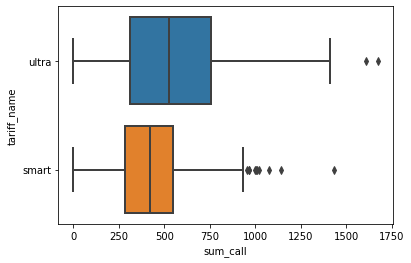

cnt_mes


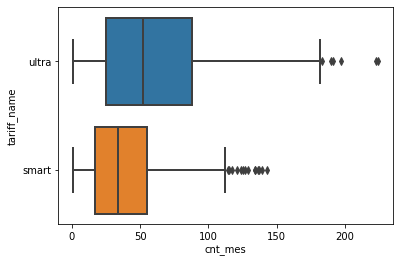

sum_mb


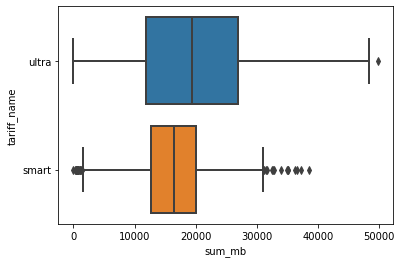

In [34]:
for f in ['sum_call', 'cnt_mes', 'sum_mb']:
    print(f"{f}")
    sns.boxplot(y='tariff_name', x=f, data=users_data, linewidth=2)
    plt.show()

#### Вывод
Был произведен анализ на основе таких метрик, как среднее, медиана, дисперсия, стандартное отклонение.
По результатам анализа было выявлено:
- По тарифу ultra клиенты чаще пользуются услугами оператора 
- При этом количество клиентов пользующихся тарифом ultra практически в два раза меньше, чем smart
- Медиана по <b> количеству расходованных минут </b> на тарифе smart равно 423, на ultra 528, при этом первый квантиль находится примерно на одном уровне, а третий квантиль более разбросан: smart=545, ultra=756. Медиана тарифа ultra практически совпадает с 3 квантилем тарифа smart, т.е. пользователи на тарифе ultra расходуют больше минут. Так же видим больший размах данных (дисперсию) на тарифе ultra
- Медиана по <b> количеству расходованных сообщение </b> на тарифе smart равно 34, на ultra 52, при этом первый квантиль равен 17 и 25 соответственно, а третий квантиль более разбросан: smart=55, ultra=88. Медиана тарифа ultra совпадает с 3 квантилем тарифа smart, т.е. пользователи на тарифе ultra расходуют сообщение больше. Так же видим больший размах данных (дисперсию) на тарифе ultra
- Медиана по <b> расходованному интернет траффику </b> на тарифе smart равно 16.5, на ultra 19.4, при этом первый квантиль равен 12.7 и 11.9 соответственно, а третий квантиль более разбросан: smart=20, ultra=26.9. Пользователи на тарифе ultra расходуют траффика больше, чем на smart, при этом пользователей, которые пользуются интернет не часто, на тарифе ultra тоже больше (видим по первому квантилю). Так же видим больший размах данных (дисперсию) на тарифе ultra
- В данных по тарифу smart много выбросов (>1.5IQR), возможно, этим клиентам (со значениями >1.5IQR) стоит предложить перейти на тариф ultra, так как трафика, пакетно предоставляемого в тарифе smart, им недостаточно

### Проверка гипотез

#### Гипотеза 1
средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [35]:
hyp_1_pv = stat.ttest_ind(users_data_ultra['revenue'], users_data_smart['revenue'], equal_var=True)
print('p-значение: ', hyp_1_pv.pvalue)

p-значение:  1.7500644494217241e-147


In [36]:
alpha = 0.05

if hyp_1_pv.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


##### Вывод
- За нулевую гипотезу (H0) было взято утверждение: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
- Альтернативная гипотеза (H1): средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны
- Пороговое значение alpha было задано 0.05

Была проведена проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, в результате которой мы отвергли нулевую гипотезу

#### Гипотеза 2
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [37]:
users_data.city.value_counts()

Москва             610
Санкт-Петербург    266
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Нижневартовск        6
Сургут               6
Кемерово             5
Химки                5
Иваново              2
Name: city, Length: 76, dtype: int64

In [38]:
users_data_Moscow = users_data.query("city=='Москва'")
users_data_Moscow.shape

(610, 25)

In [39]:
users_data_not_Moscow = users_data.query("not city=='Москва'")
users_data_not_Moscow.shape

(2572, 25)

In [40]:
hyp_2_pv = stat.ttest_ind(users_data_Moscow['revenue'], users_data_not_Moscow['revenue'], equal_var=True)
print('p-значение: ', hyp_2_pv.pvalue)

p-значение:  0.5135226575768945


In [41]:
alpha = 0.05

if hyp_2_pv.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


##### Вывод

- За нулевую гипотезу (H0) было взято утверждение: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- Альтернативная гипотеза (H1): средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- Пороговое значение alpha было задано 0.05

Была проведена проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, в результате которой мы не смогли отвергнуть нулевую гипотезу

### Вывод

В ходе проекта была проведены следующие аналитические задачи:
- предварительный анализ тарифов на небольшой выборке клиентов
- Для каждого пользователя произвели расчет метрик:
- - количество сделанных звонков и израсходованных минут разговора по месяцам
- - количество отправленных сообщений по месяцам
- - объем израсходованного интернет-трафика по месяцам
- - помесячную выручку с каждого пользователя
- описали поведение клиентов оператора, исходя из выборки: среднее количество, дисперсию и стандартное отклонение
- построили графики, описали распределения
- проверили две гипотезы

Пришли к следующим выводам:
- тариф ultra более подходит для клиентов, часто пользующихся услугами связи, что объясняется большим количеством доступного в рамках тарифа трафика
- большая стоимость тарифного плана не оказывает не означает что и выручка компании от пользователей с таким тарифом будет больше:
- - расход в основном в рамках предоставляемого пакета услуг
- - не покупают доп. траффик
- - отвергли гипотезу, что выручки по двум тарифам одинаковы
- первый квантиль по расходованному интернет трафику тарифа smart находится практически на одном уровне с количеством mb, предоставляемых на этом тарифе. Это означает, что большинству пользователей не хватает количества бесплатных mb, и они вынуждены покупать доп. траффик, что приносит компании больше прибыли

Считаю, что для компании более выгодным является тариф smart. Но в то же время не стоит забывать, что пользователям с высоким потреблением услуг объема предоставляемого трафика явно будет недостаточно, и если думать только о прибыли компании и перевести их на smart, то может возникнуть сильное недовольство и отток клиентов.
Учитывая, что в объеме предоставляемого трафика двух тарифах сейчас слишком сильный разброс (15гб vs 30гб, 500 vs 3000 минут), могу предложить создать третий тариф, объем предоставляемого трафика которого будет находится между текущими двумя тарифами. Часть клиентов сможет перейти со smart на него, а мы в свою очередь получим больше ожидаемой прибыли от абонентской платы.

После каждого этапа проекта были оставлены более детальные выводы